In [1]:
from psd_tools import PSDImage
import cv2
import matplotlib.pyplot as plt
from retinaface import RetinaFace
import numpy as np
import pandas as pd

In [7]:
psd = PSDImage.open(r"2.psd")
x=psd.topil()
x.save("test.png")

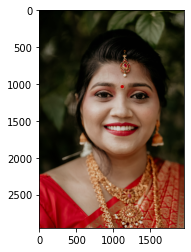

In [104]:
img_ = psd[6].topil()
plt.imshow(img_)

In [86]:
faces = RetinaFace.detect_faces(psd[4].name+'.png')

In [87]:
faces

(array([], shape=(0, 5), dtype=float64),
 array([], shape=(0, 5, 2), dtype=float64))

In [12]:
for face in faces:
    print(faces[face])

{'score': 0.9975019097328186, 'facial_area': [2698, 1311, 3001, 1666], 'landmarks': {'right_eye': [2756.6438, 1454.0575], 'left_eye': [2892.905, 1446.583], 'nose': [2809.5889, 1473.4878], 'mouth_right': [2767.3076, 1563.8302], 'mouth_left': [2887.342, 1556.6013]}}


In [47]:
x,y,w,h = faces[face]['facial_area']
x + (w-x)//2

2849

In [68]:
l = nimg.shape[1]
l//3

1774

In [80]:
def information(face,name,l,b):
    x,y,w,h = face['facial_area']
    pos = ''
    cof = x + (w-x)//2
    if cof<l//3:
        pos+='L'
    elif l//3<cof<2*(l//3):
        pos+='C'
    else:
        pos+="R"
    t = ''
    if l>b:
        t+='H'
    else:
        t+='V'

    data.append([name,t,pos,y,x,l-w])
    
    return

In [99]:
data=[]
for layer in psd:
    img = layer.topil()
    img.save(layer.name+'.png')
    nimg = cv2.imread(layer.name+'.png')
    faces = RetinaFace.detect_faces(nimg)
    if len(faces) ==2:
        continue
    information(faces['face_1'],layer.name,nimg.shape[1],nimg.shape[0])

In [100]:
data

[['Sheet1_Object2_1_bg_c_h', 'H', 'C', 1311, 2698, 2321],
 ['Sheet1_Object2_2_bg_r_h', 'H', 'R', 1775, 5238, 1552],
 ['Sheet1_Object2_3_v', 'V', 'C', 869, 1081, 812],
 ['Sheet1_Object2_4_v', 'V', 'C', 584, 610, 341],
 ['Sheet1_Object2_5_h', 'H', 'C', 182, 1041, 647]]

In [101]:
df = pd.DataFrame(data, columns=['Name', 'Type','Positon','Headroom','Leftroom','Rightroom'])

In [102]:
df

,Name,Type,Positon,Headroom,Leftroom,Rightroom
0,Sheet1_Object2_1_bg_c_h,H,C,1311,2698,2321
1,Sheet1_Object2_2_bg_r_h,H,R,1775,5238,1552
2,Sheet1_Object2_3_v,V,C,869,1081,812
3,Sheet1_Object2_4_v,V,C,584,610,341
4,Sheet1_Object2_5_h,H,C,182,1041,647


In [103]:
df.to_csv('data.csv',index=False)

Multifaces is a problem,
Time Consuming,
Face Recognition errors

In [91]:
numlayers = []
for layer in psd:
    numlayers.append(layer.numpy())

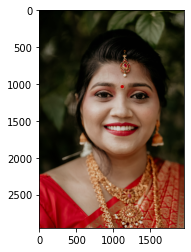

In [92]:
plt.imshow(numlayers[4])